In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data=pd.read_csv("C:\\Users\\saina\\Test.csv")

In [112]:
data.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [113]:
data.shape

(5000, 2)

In [114]:
data['label'].value_counts()

label
1    2505
0    2495
Name: count, dtype: int64

<Axes: xlabel='label'>

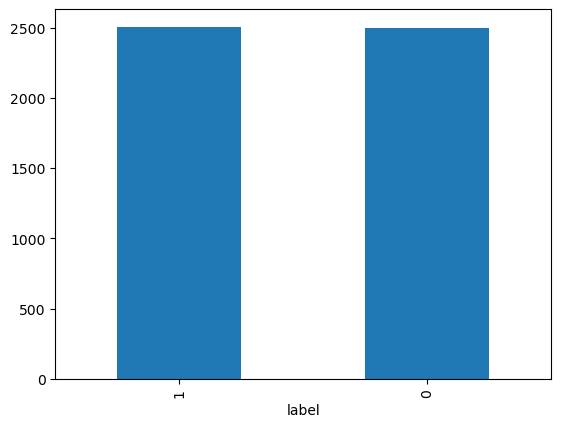

In [115]:
data['label'].value_counts().plot(kind='bar')

In [117]:
data['text'][66]

"What ever possessed Martin Scorcese to remake this film? And not only did he remake it, completely ruin it? The nonsensical decision to make the character played by Robert DeNiro (in his most overdone performance, and that's saying a lot) into a religious fanatic is ridiculous, and exemplary of attitudes harbored by Hollywood (and Mr. Scorcese especially)- attitudes that compel writers to think that the best way to make a character insane is to tattoo a crucifix on his back. In any case, this movie is awful. <br /><br />"

In [118]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\([DP)][\W])') 

def preprocessing(text):
    if not text: 
        return []
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-',' ')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set and word.isalnum()]

    return " ".join(text)

In [120]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world'

In [121]:
data['text'] = data['text'].apply(lambda x: preprocessing(x) if pd.notnull(x) else x)

In [122]:
data['text']

0       alway wrote seri complet stink fest jim belush...
1       1st watch 12 7 2002 3 10 dir steve purcel typi...
2       movi poorli written direct fell asleep 30 minu...
3       interest thing miryang secret sunshin actor je...
4       first read berlin meer expect much thought rig...
                              ...                        
4995    kind pictur john lassit would make today advan...
4996    must see saw whip press screen hilari talk non...
4997    nbc asham allow children see definit would tel...
4998    movi clumsi mishmash variou ghost stori suspen...
4999    formula movi illegitim son rich chilenian stan...
Name: text, Length: 5000, dtype: object

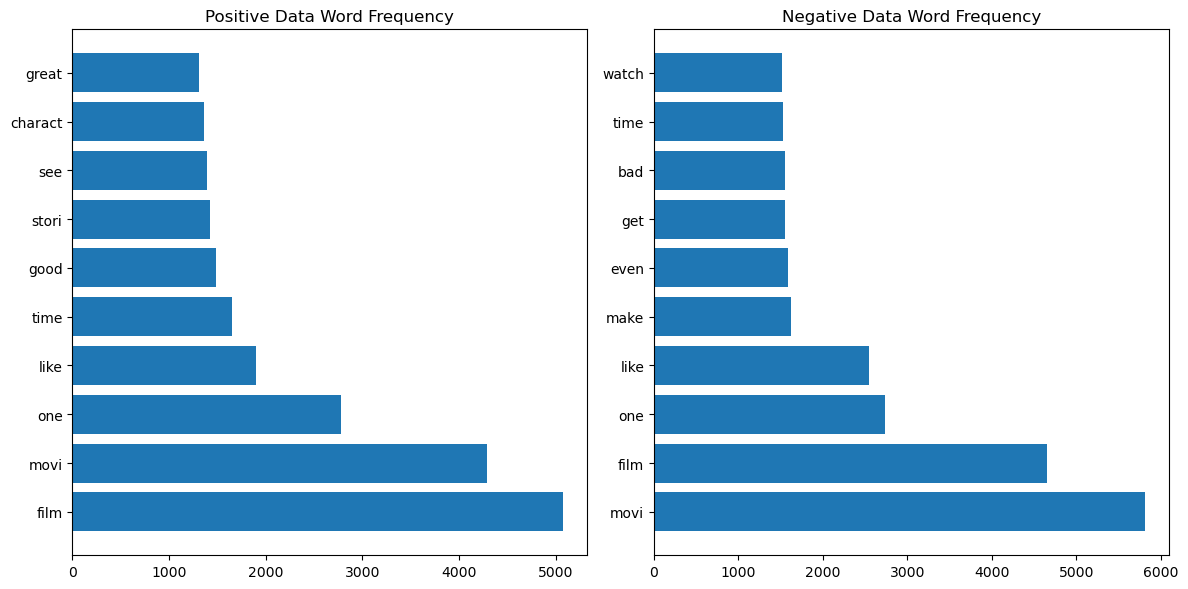

In [123]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']
import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words


# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')


plt.tight_layout()
plt.show()

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [126]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    6.2s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    6.3s finished


In [127]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8604


In [128]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [136]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction


prediction=prediction("The movie was great")

In [137]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")

positive comment
